Try setting OPM_NUM_THREADS=1.

In [1]:
import glob
import itertools
import logging
from operator import attrgetter
import os
import pprint
import time

import matplotlib.pyplot as plt
%matplotlib inline
import scipy.misc

import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as hc
from scipy.spatial.distance import pdist

import sklearn.utils

from mrfitty.base import ReferenceSpectrum
from mrfitty.base import InterpolatedSpectrumSet

logging.basicConfig(level=logging.WARN)

In [2]:
iron_archived_cores_data_dir_path = '/home/jlynch/host/project/th_sln/archived_tills_for_trees_Jan_30_2017/'
os.path.exists(iron_archived_cores_data_dir_path)

True

Read all iron spectra in the core directories.

In [3]:
iron_archived_reference_glob = os.path.join(iron_archived_cores_data_dir_path, 'Fe_references/*.e')
print('references glob: {}'.format(iron_archived_reference_glob))
iron_archived_cores_spectrum_glob = os.path.join(iron_archived_cores_data_dir_path, '*/*_Fe_XANES/*.e')
print('cores glob: {}'.format(iron_archived_cores_spectrum_glob))

references glob: /home/jlynch/host/project/th_sln/archived_tills_for_trees_Jan_30_2017/Fe_references/*.e
cores glob: /home/jlynch/host/project/th_sln/archived_tills_for_trees_Jan_30_2017/*/*_Fe_XANES/*.e


In [4]:
iron_archived_reference_list, _ = list(ReferenceSpectrum.read_all([iron_archived_reference_glob]))
print('refrence count: {}'.format(len(iron_archived_reference_list)))
iron_archived_cores_spectrum_list, _ = list(ReferenceSpectrum.read_all([iron_archived_cores_spectrum_glob]))
print('core spectrum count: {}'.format(len(iron_archived_cores_spectrum_list)))

refrence count: 13
core spectrum count: 49


What are the maximum and minimum reference energies?

In [5]:
reference_min_energy = np.max([r.data_df.energy.values[0] for r in iron_archived_reference_list])
reference_max_energy = np.min([r.data_df.energy.values[-1] for r in iron_archived_reference_list])
print('reference minimum energy: {:5.2f}'.format(reference_min_energy))
print('reference maximum energy: {:5.2f}'.format(reference_max_energy))

reference minimum energy: 7014.22
reference maximum energy: 7399.66


What are the maximum and minimum core spectrum energies?

In [6]:
min_energy = np.max([r.data_df.energy.values[0] for r in iron_archived_cores_spectrum_list])
max_energy = np.min([r.data_df.energy.values[-1] for r in iron_archived_cores_spectrum_list])
print('minimum energy: {:5.2f}'.format(min_energy))
print('maximum energy: {:5.2f}'.format(max_energy))

minimum energy: 7011.08
maximum energy: 7412.04


In [7]:
interpolate_energy_range = np.linspace(start=7100.0, stop=7250.0, num=200)
print('interpolate_energy_range.shape: {}'.format(interpolate_energy_range.shape))
print('interpolate_energy_range:\n{}'.format(pprint.pformat(interpolate_energy_range.tolist()[:10])))

interpolate_energy_range.shape: (200,)
interpolate_energy_range:
[7100.0,
 7100.753768844221,
 7101.507537688442,
 7102.261306532663,
 7103.015075376885,
 7103.768844221106,
 7104.522613065326,
 7105.276381909548,
 7106.030150753769,
 7106.78391959799]


,Aegirine_standard.e,Arsenopyrite Julcani_standard.e,Brucite_standard.e,Chlorite_Ripidolite_CCa2_standard.e,FeDextran_standard.e,Goethite_Fendorf_standard.e,GreenRust_CO3_standard.e,GreenRust_Cl_standard.e,Lizardite_standard.e,Mackinawite_standard.e,...,UMRB2_164_spot_4_contact.e,UMRB2_164_spot_5_contact.e,UMRB2_165_spot_1_aquifer.e,UMRB2_165_spot_3_aquifer.e,UMRB2_165_spot_4_aquifer.e,UMRB2_167_spot_1_contact.e,UMRB2_167_spot_2_contact.e,UMRB2_167_spot_3_contact.e,UMRB2_167_spot_4_contact.e,magnetite_Blackman_IODP1309_standard.e
7100.000000,0.004159,0.005751,0.005565,0.003871,0.006149,-0.003960,0.003610,0.003708,0.004365,0.004932,...,0.005414,0.006585,0.005916,0.002962,0.006201,0.004747,0.006272,0.006118,0.004172,0.005172
7100.753769,0.004532,0.006517,0.006471,0.004206,0.005720,-0.004446,0.004063,0.004225,0.004152,0.005001,...,0.005964,0.007283,0.006648,0.003100,0.006429,0.005002,0.007273,0.006420,0.004431,0.005737
7101.507538,0.004977,0.007326,0.006796,0.004692,0.005044,-0.003763,0.004467,0.004704,0.004839,0.005284,...,0.006501,0.007941,0.007251,0.003660,0.007184,0.005586,0.008210,0.007991,0.005050,0.006295
7102.261307,0.005376,0.007166,0.007184,0.005131,0.002556,-0.003052,0.005090,0.005285,0.005139,0.006307,...,0.007281,0.008981,0.007949,0.004176,0.007943,0.006166,0.008432,0.008837,0.005862,0.007016
7103.015075,0.006201,0.007951,0.008478,0.005657,0.005089,-0.004118,0.005648,0.005926,0.005317,0.008110,...,0.008140,0.009702,0.009214,0.004474,0.008647,0.007057,0.009458,0.009427,0.006737,0.007410


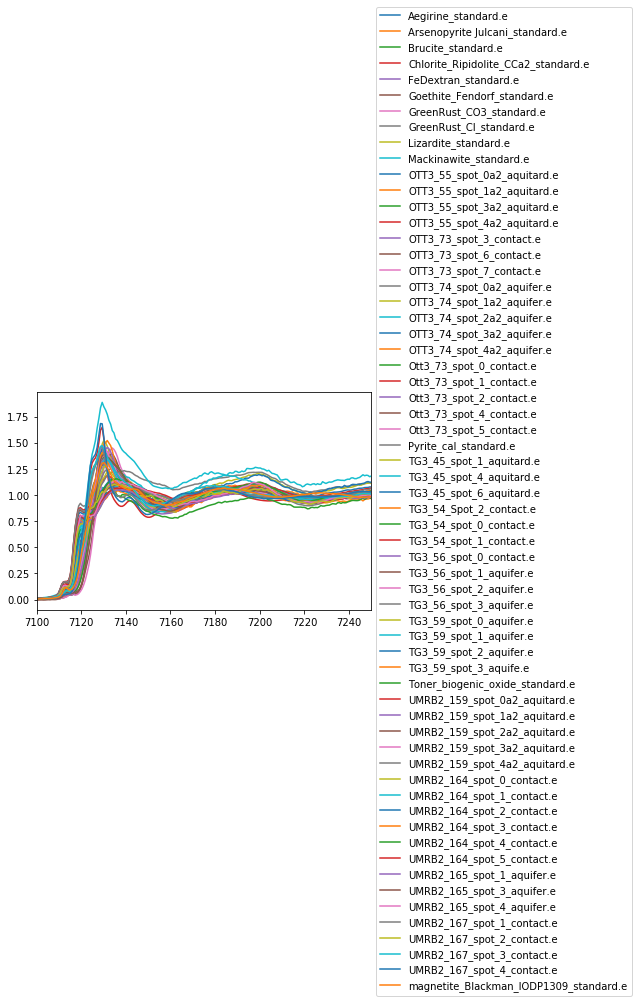

In [8]:
# interpolate references and spectra in one data frame because concatentating data frames with a 
# floating point index is not working for me
interpolated_iron_archived_ref_and_cores_df = InterpolatedSpectrumSet.get_interpolated_spectrum_set_df(
    energy_range=interpolate_energy_range,
    spectrum_set=set(itertools.chain(iron_archived_reference_list, iron_archived_cores_spectrum_list)))
interpolated_iron_archived_ref_and_cores_df.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
interpolated_iron_archived_ref_and_cores_df.head()

In [9]:
def permute_row_elements(df):
    for i in range(df.shape[0]):
        df.values[i, :] = sklearn.utils.shuffle(df.values[i, :])
    return df
# demonstrate permuting row elements
x_df = pd.DataFrame(data=np.array(range(9)).reshape((3,3)))
print('before permuting row elements:')
print(x_df.head())
permute_row_elements(x_df)
print('after permuting row elements:')
print(x_df)

before permuting row elements:
   0  1  2
0  0  1  2
1  3  4  5
2  6  7  8
after permuting row elements:
   0  1  2
0  0  2  1
1  3  5  4
2  6  8  7


In [10]:
def cluster_with_sig_cut(variable_by_sample_df, title, pdist_metric, linkage_method):
    #pdist_metric = 'correlation'
    distance_for_sample_pairs = pdist(X=np.transpose(variable_by_sample_df.values), metric=pdist_metric)
    print('{}: {} sample pairs'.format(title, len(distance_for_sample_pairs)))
    plt.figure()
    plt.title(title)
    plt.hist(distance_for_sample_pairs)
    plt.xlabel('{} distance'.format(pdist_metric))
    plt.ylabel('{} pairs'.format(variable_by_sample_df.shape))
    plt.show()

    resample_count = 1000
    expected_distance_list = []
    for i in range(resample_count):
        # permute the elements of each row of variable_by_sample_df
        p_variable_by_sample_df = permute_row_elements(variable_by_sample_df.copy())
        p_distance_for_sample_pairs = pdist(X=np.transpose(p_variable_by_sample_df.values), metric=pdist_metric)
        p_linkage_distance_variable_by_sample = hc.linkage(y=p_distance_for_sample_pairs, method=linkage_method)
        p_dendrogram = hc.dendrogram(Z=p_linkage_distance_variable_by_sample, no_plot=True)
        expected_distance_list.extend([d for (_, _, d, _) in p_dendrogram['dcoord']])

    p = 95.0
    alpha = 1.0 - p/100.0
    cutoff_distance = np.percentile(expected_distance_list, q=p)
    print('cutoff distance is {}'.format(cutoff_distance))

    plt.figure()
    plt.hist(expected_distance_list)
    plt.title('dendrogram distance null distribution')
    plt.show()

    linkage_distance_variable_by_sample = hc.linkage(y=distance_for_sample_pairs, method=linkage_method)
    plt.figure(figsize=(3.7, 7))
    dendrogram = hc.dendrogram(
        Z=linkage_distance_variable_by_sample,
        orientation='left',
        labels=variable_by_sample_df.columns)
    
    icoords = [i for i in itertools.chain(dendrogram['icoord'])]
    
    plt.vlines(cutoff_distance, ymin=np.min(icoords), ymax=np.max(icoords))
    plt.title('{}\n{} linkage'.format(title, linkage_method))
    plt.xlabel('{} distance'.format(pdist_metric))
    plt.savefig(title + '.pdf', format='pdf')
    plt.show()
    


reference column list has 13 elements:
('Aegirine_standard.e',
 'Arsenopyrite Julcani_standard.e',
 'Brucite_standard.e',
 'Chlorite_Ripidolite_CCa2_standard.e',
 'FeDextran_standard.e',
 'Goethite_Fendorf_standard.e',
 'GreenRust_CO3_standard.e',
 'GreenRust_Cl_standard.e',
 'Lizardite_standard.e',
 'Mackinawite_standard.e',
 'Pyrite_cal_standard.e',
 'Toner_biogenic_oxide_standard.e',
 'magnetite_Blackman_IODP1309_standard.e')
core OTT3 column list has 12 elements:
('OTT3_55_spot_0a2_aquitard.e',
 'OTT3_55_spot_1a2_aquitard.e',
 'OTT3_55_spot_3a2_aquitard.e',
 'OTT3_55_spot_4a2_aquitard.e',
 'OTT3_73_spot_3_contact.e',
 'OTT3_73_spot_6_contact.e',
 'OTT3_73_spot_7_contact.e',
 'OTT3_74_spot_0a2_aquifer.e',
 'OTT3_74_spot_1a2_aquifer.e',
 'OTT3_74_spot_2a2_aquifer.e',
 'OTT3_74_spot_3a2_aquifer.e',
 'OTT3_74_spot_4a2_aquifer.e')
Fe core OTT3 (12 spectra): 66 sample pairs


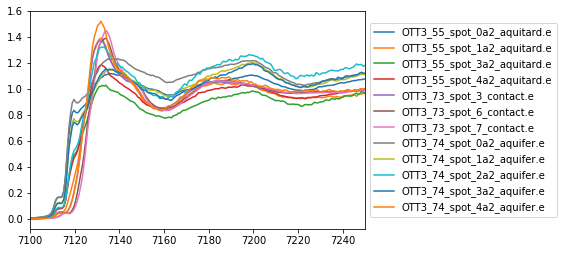

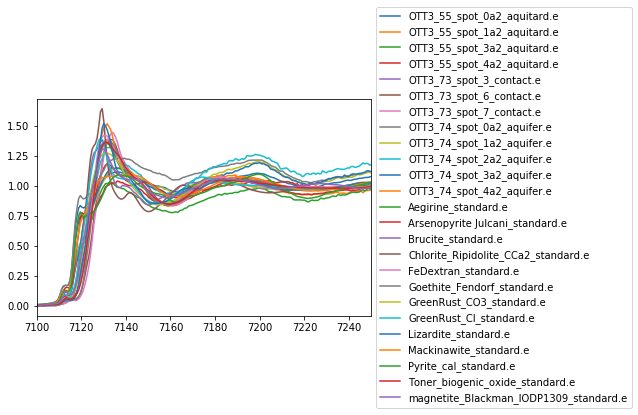

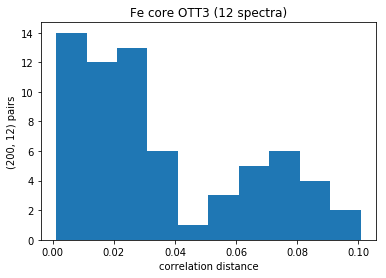

cutoff distance is 0.09627768082474171


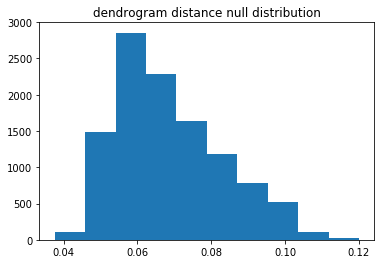

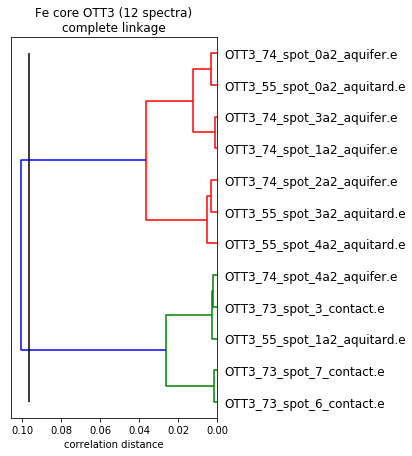

Fe core OTT3 and references (25 spectra): 300 sample pairs


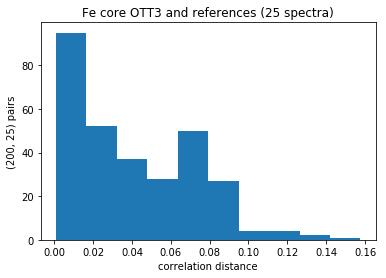

cutoff distance is 0.0851224215032978


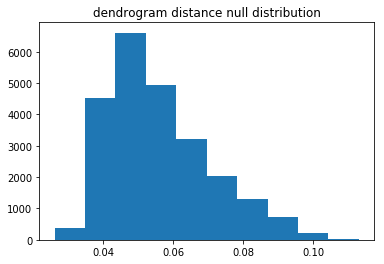

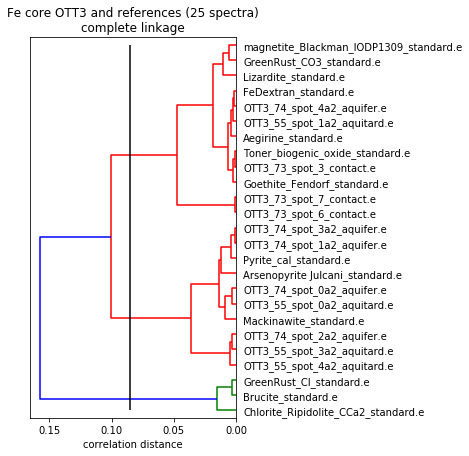

reference column list has 13 elements:
('Aegirine_standard.e',
 'Arsenopyrite Julcani_standard.e',
 'Brucite_standard.e',
 'Chlorite_Ripidolite_CCa2_standard.e',
 'FeDextran_standard.e',
 'Goethite_Fendorf_standard.e',
 'GreenRust_CO3_standard.e',
 'GreenRust_Cl_standard.e',
 'Lizardite_standard.e',
 'Mackinawite_standard.e',
 'Pyrite_cal_standard.e',
 'Toner_biogenic_oxide_standard.e',
 'magnetite_Blackman_IODP1309_standard.e')
core TG3 column list has 14 elements:
('TG3_45_spot_1_aquitard.e',
 'TG3_45_spot_4_aquitard.e',
 'TG3_45_spot_6_aquitard.e',
 'TG3_54_Spot_2_contact.e',
 'TG3_54_spot_0_contact.e',
 'TG3_54_spot_1_contact.e',
 'TG3_56_spot_0_contact.e',
 'TG3_56_spot_1_aquifer.e',
 'TG3_56_spot_2_aquifer.e',
 'TG3_56_spot_3_aquifer.e',
 'TG3_59_spot_0_aquifer.e',
 'TG3_59_spot_1_aquifer.e',
 'TG3_59_spot_2_aquifer.e',
 'TG3_59_spot_3_aquife.e')
Fe core TG3 (14 spectra): 91 sample pairs


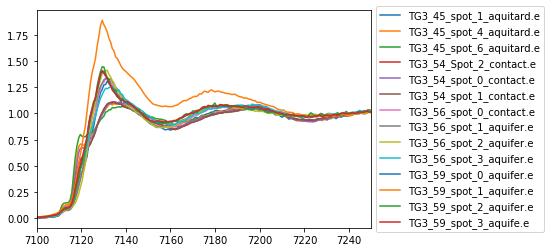

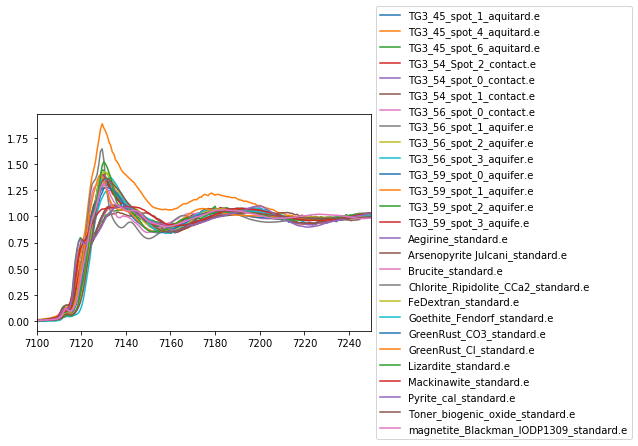

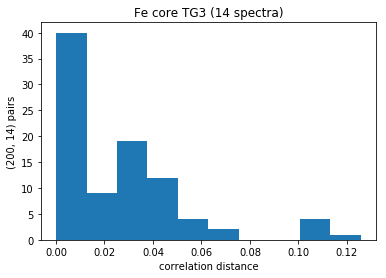

cutoff distance is 0.07601434642322345


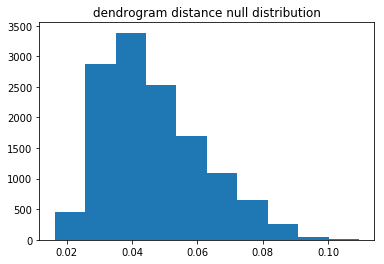

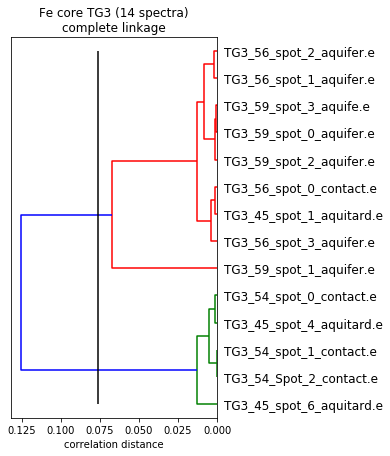

Fe core TG3 and references (27 spectra): 351 sample pairs


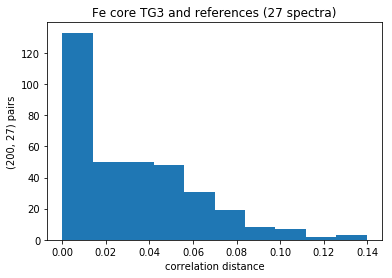

cutoff distance is 0.07105341699790715


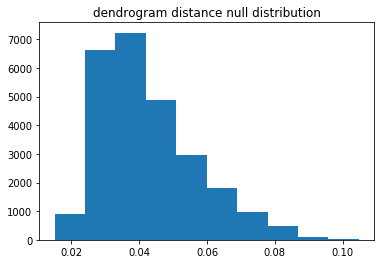

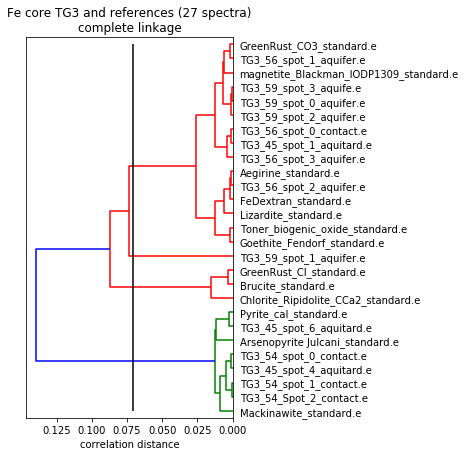

reference column list has 13 elements:
('Aegirine_standard.e',
 'Arsenopyrite Julcani_standard.e',
 'Brucite_standard.e',
 'Chlorite_Ripidolite_CCa2_standard.e',
 'FeDextran_standard.e',
 'Goethite_Fendorf_standard.e',
 'GreenRust_CO3_standard.e',
 'GreenRust_Cl_standard.e',
 'Lizardite_standard.e',
 'Mackinawite_standard.e',
 'Pyrite_cal_standard.e',
 'Toner_biogenic_oxide_standard.e',
 'magnetite_Blackman_IODP1309_standard.e')
core UMRB2 column list has 18 elements:
('UMRB2_159_spot_0a2_aquitard.e',
 'UMRB2_159_spot_1a2_aquitard.e',
 'UMRB2_159_spot_2a2_aquitard.e',
 'UMRB2_159_spot_3a2_aquitard.e',
 'UMRB2_159_spot_4a2_aquitard.e',
 'UMRB2_164_spot_0_contact.e',
 'UMRB2_164_spot_1_contact.e',
 'UMRB2_164_spot_2_contact.e',
 'UMRB2_164_spot_3_contact.e',
 'UMRB2_164_spot_4_contact.e',
 'UMRB2_164_spot_5_contact.e',
 'UMRB2_165_spot_1_aquifer.e',
 'UMRB2_165_spot_3_aquifer.e',
 'UMRB2_165_spot_4_aquifer.e',
 'UMRB2_167_spot_1_contact.e',
 'UMRB2_167_spot_2_contact.e',
 'UMRB2_167_spot

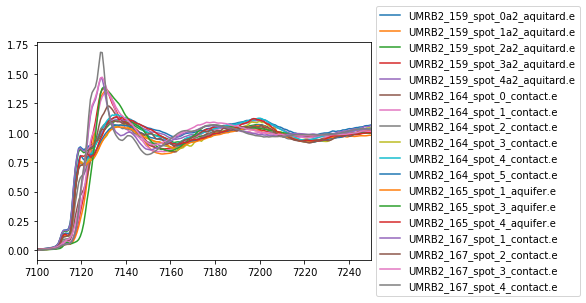

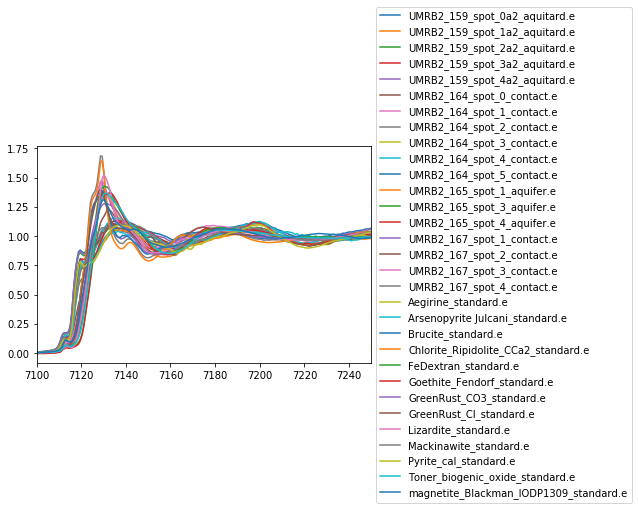

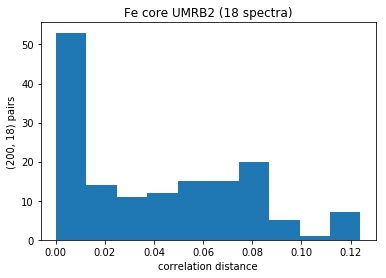

cutoff distance is 0.07625963951590085


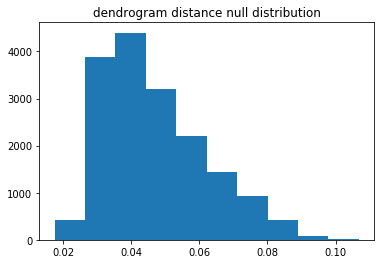

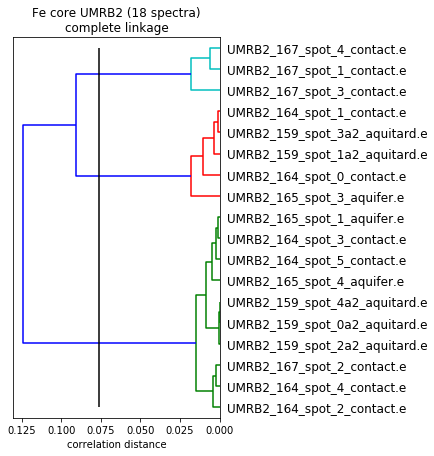

Fe core UMRB2 and references (31 spectra): 465 sample pairs


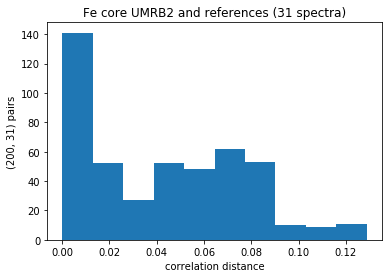

cutoff distance is 0.07472119595698158


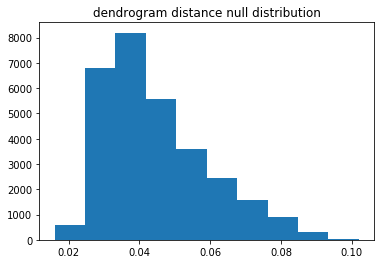

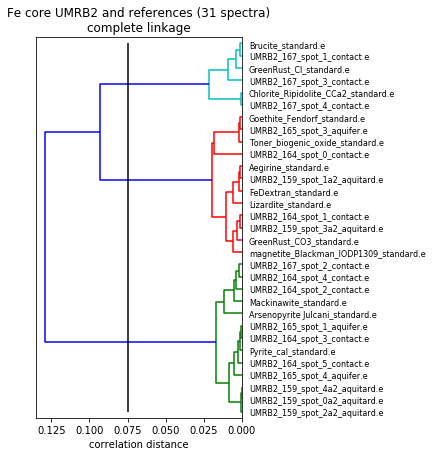

In [11]:
for core in ['OTT3', 'TG3', 'UMRB2']:
    # combine core and references
    ref_column_list = tuple([c for c in interpolated_iron_archived_ref_and_cores_df.columns if 'standard' in c])
    print('reference column list has {} elements:\n{}'.format(len(ref_column_list), pprint.pformat(ref_column_list)))
    core_column_list = tuple([c for c in interpolated_iron_archived_ref_and_cores_df.columns if core in c])
    print('core {} column list has {} elements:\n{}'.format(core, len(core_column_list), pprint.pformat(core_column_list)))
    core_interpolated_iron_archived_df = interpolated_iron_archived_ref_and_cores_df.loc[:, core_column_list]
    core_interpolated_iron_archived_df.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
    core_interpolated_iron_archived_df.head()

    core_and_ref_column_list = tuple(itertools.chain(core_column_list, ref_column_list))
    core_and_ref_interpolated_iron_archived_df = interpolated_iron_archived_ref_and_cores_df.loc[:, core_and_ref_column_list]
    core_and_ref_interpolated_iron_archived_df.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
    core_and_ref_interpolated_iron_archived_df.head()

    cluster_with_sig_cut(
        core_interpolated_iron_archived_df,
        title='Fe core {} ({} spectra)'.format(core, core_interpolated_iron_archived_df.shape[1]),
        pdist_metric='correlation',
        linkage_method='complete')

    cluster_with_sig_cut(
        core_and_ref_interpolated_iron_archived_df,
        title='Fe core {} and references ({} spectra)'.format(core, core_and_ref_interpolated_iron_archived_df.shape[1]),
        pdist_metric='correlation',
        linkage_method='complete')


reference column list has 13 elements:
('Aegirine_standard.e',
 'Arsenopyrite Julcani_standard.e',
 'Brucite_standard.e',
 'Chlorite_Ripidolite_CCa2_standard.e',
 'FeDextran_standard.e',
 'Goethite_Fendorf_standard.e',
 'GreenRust_CO3_standard.e',
 'GreenRust_Cl_standard.e',
 'Lizardite_standard.e',
 'Mackinawite_standard.e',
 'Pyrite_cal_standard.e',
 'Toner_biogenic_oxide_standard.e',
 'magnetite_Blackman_IODP1309_standard.e')
all cores column list has UMRB2 elements:
49
Fe all cores(49 spectra): 1176 sample pairs


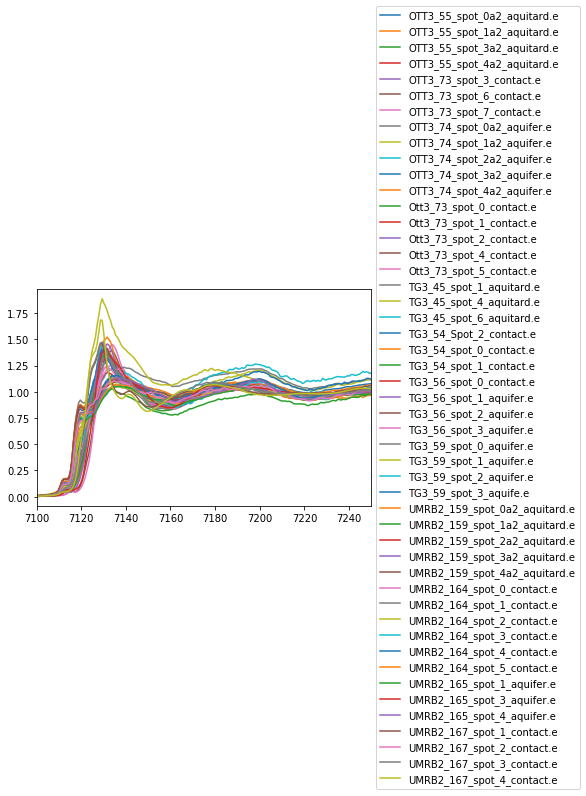

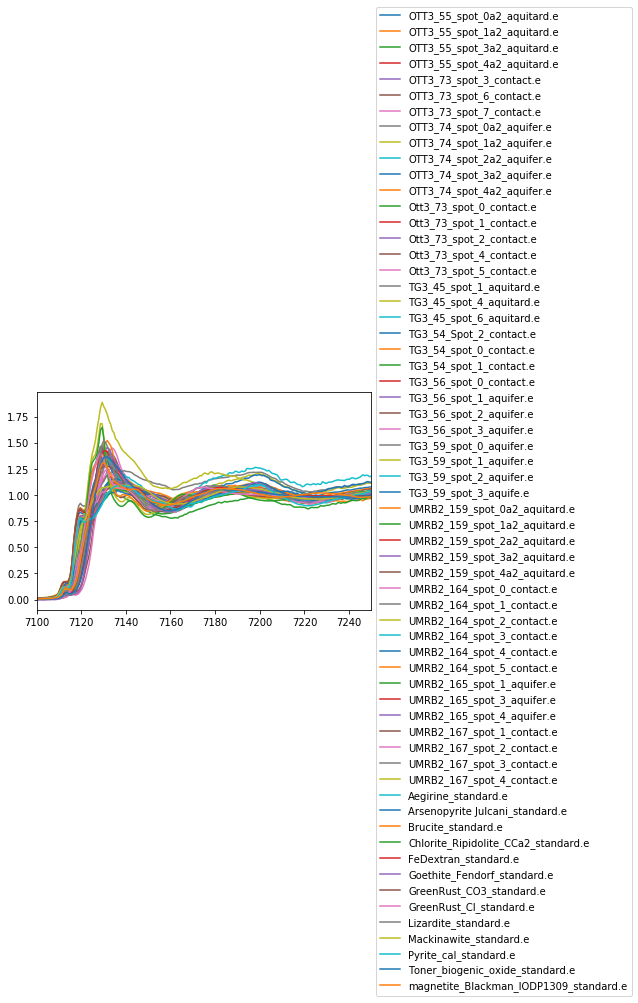

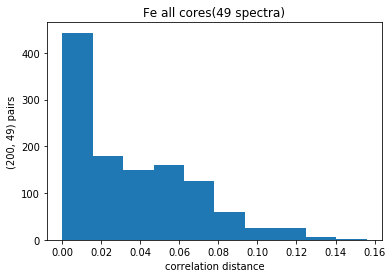

cutoff distance is 0.08098786515732262


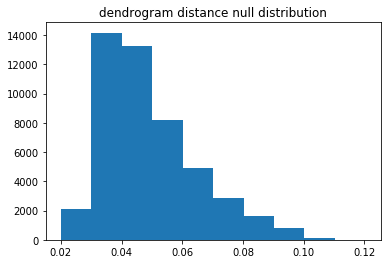

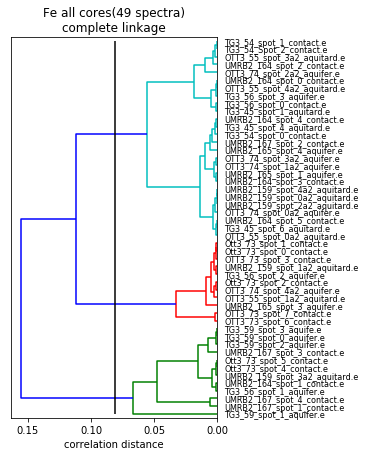

Fe all cores and references (62 spectra): 1891 sample pairs


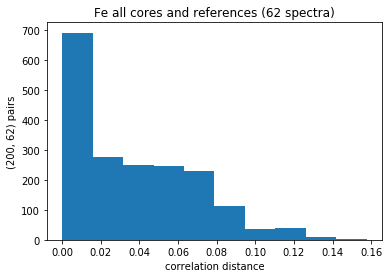

cutoff distance is 0.07762279244419684


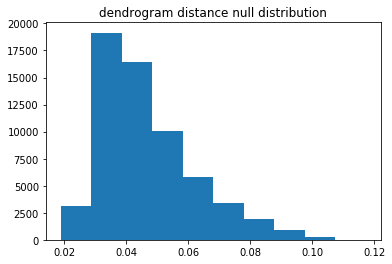

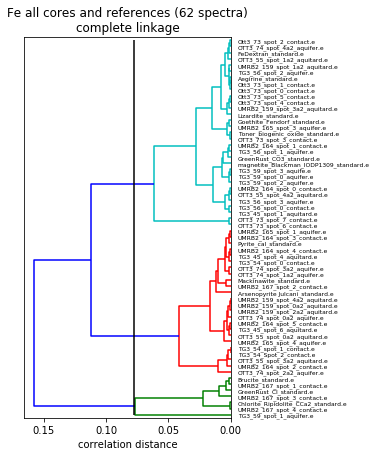

In [12]:
# all cores
ref_column_list = tuple([c for c in interpolated_iron_archived_ref_and_cores_df.columns if 'standard' in c])
print('reference column list has {} elements:\n{}'.format(len(ref_column_list), pprint.pformat(ref_column_list)))

core_column_list = tuple([c for c in interpolated_iron_archived_ref_and_cores_df.columns if 'standard' not in c])
print('all cores column list has {} elements:\n{}'.format(core, len(core_column_list), pprint.pformat(core_column_list)))
core_interpolated_iron_archived_df = interpolated_iron_archived_ref_and_cores_df.loc[:, core_column_list]
core_interpolated_iron_archived_df.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
core_interpolated_iron_archived_df.head()

core_and_ref_column_list = tuple(itertools.chain(core_column_list, ref_column_list))
core_and_ref_interpolated_iron_archived_df = interpolated_iron_archived_ref_and_cores_df.loc[:, core_and_ref_column_list]
core_and_ref_interpolated_iron_archived_df.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
core_and_ref_interpolated_iron_archived_df.head()

cluster_with_sig_cut(
    core_interpolated_iron_archived_df,
    title='Fe all cores({} spectra)'.format(core_interpolated_iron_archived_df.shape[1]),
    pdist_metric='correlation',
    linkage_method='complete')

cluster_with_sig_cut(
    core_and_ref_interpolated_iron_archived_df,
    title='Fe all cores and references ({} spectra)'.format(core_and_ref_interpolated_iron_archived_df.shape[1]),
    pdist_metric='correlation',
    linkage_method='complete')
